In [1]:
"""
Basic Image Processing
- image loading
- image resizing
- image plot

Surk Park (parksurk@gmail.com)
"""
# import packages
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import pandas
import skimage.io
import skimage.transform
import tensorflow as tf

%matplotlib inline

print ("Packages are loaded...")


Packages are loaded...


In [2]:
# Print  Current Working Directory
cwd = os.getcwd()
print ("Current Working Directory is %s" % (cwd))

Current Working Directory is /home/parksurk/dl/dl-with-tf


<class 'numpy.ndarray'> (1200, 1600, 3)


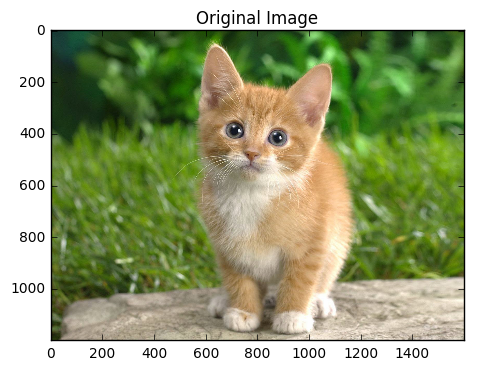

In [3]:
# Plot image
cat = imread(cwd + "/images/cat.jpg")
print (type(cat), cat.shape)
plt.figure(0)
plt.imshow(cat)
plt.title("Original Image")
plt.draw()

size of cat_small is (100, 100, 3)
type of cat_small is <class 'numpy.ndarray'>


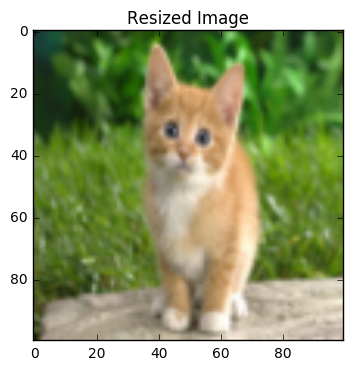

In [4]:
# Resize image
cat_small = imresize(cat, [100, 100, 3])
print ("size of cat_small is %s" % (cat_small.shape,))
print ("type of cat_small is", type(cat_small))

plt.figure(1)
plt.imshow(cat_small)
plt.title("Resized Image")
plt.draw()

size of cat_small_gray is (100, 100)
type of cat_small_gray is <class 'numpy.ndarray'>


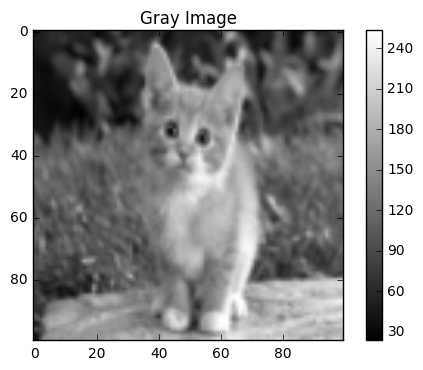

In [5]:
# Grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
cat_small_gray = rgb2gray(cat_small)
print ("size of cat_small_gray is %s" % (cat_small_gray.shape,))
print ("type of cat_small_gray is", type(cat_small_gray))

plt.figure(2)
plt.imshow(cat_small_gray, cmap=plt.get_cmap("gray"))
plt.title("Gray Image")
plt.colorbar()
plt.draw()

In [6]:
# Convert to Vector
catrowvec = np.reshape(cat_small_gray, (1, -1))
print ("size of catrowvec is %s" % (catrowvec.shape,))
print ("type of catrowvec is", type(catrowvec))

# Convert to Matrix
catmatrix = np.reshape(cat_small_gray, (100, 100))
print ("size of catmatrix is %s" % (catmatrix.shape, ))
print ("type of catmatrix is", type(catmatrix))

size of catrowvec is (1, 10000)
type of catrowvec is <class 'numpy.ndarray'>
size of catmatrix is (100, 100)
type of catmatrix is <class 'numpy.ndarray'>


In [7]:
# Load from Folder
cwd = os.getcwd()
path = cwd + "/images"
valid_exts = [".jpg", ".jgif", ".jpng", ".jtga", ]

print ("images in %s are: \n %s" % (path, os.listdir(path)))



images in /home/parksurk/dl/dl-with-tf/images are: 
 ['2014-oscar-twitter-pic-600x308.jpg', 'cats', 'cat.jpg', 'dogs', 'lenna.jpg']


In [8]:
# Append images and their Names to Lists
imgs = []
names = []
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    print ("ext : ", ext)
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    names.append(os.path.splitext(f)[0] + os.path.splitext(f)[1])
    
# Check
print ("Type of 'imgs': ", type(imgs))
print ("Length of 'imgs': ", len(imgs))
for curr_img, curr_name, i in zip(imgs, names, range(len(imgs))):
    print ("[%d] Type of 'curr_img': %s" % (i, type(curr_img)))
    print ("    Name : %s" % (curr_name))
    print ("    Size of 'curr_img' : %s" % (curr_img.shape,))






ext :  .jpg
ext :  
ext :  .jpg
ext :  
ext :  .jpg
Type of 'imgs':  <class 'list'>
Length of 'imgs':  3
[0] Type of 'curr_img': <class 'numpy.ndarray'>
    Name : 2014-oscar-twitter-pic-600x308.jpg
    Size of 'curr_img' : (308, 600, 3)
[1] Type of 'curr_img': <class 'numpy.ndarray'>
    Name : cat.jpg
    Size of 'curr_img' : (1200, 1600, 3)
[2] Type of 'curr_img': <class 'numpy.ndarray'>
    Name : lenna.jpg
    Size of 'curr_img' : (168, 300, 3)


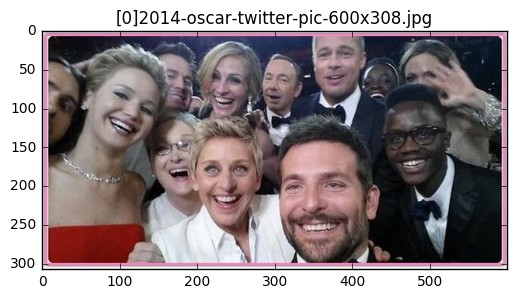

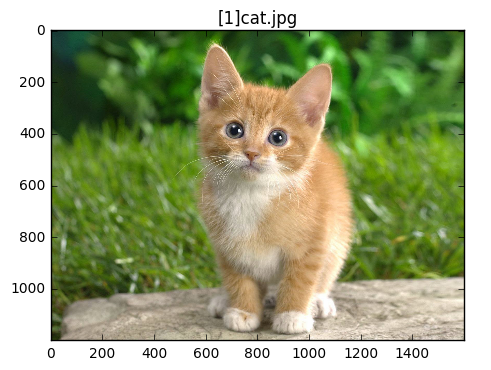

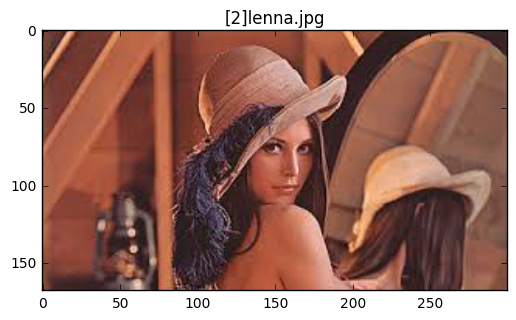

In [9]:
# Plot images list
for curr_img, curr_name, i in zip(imgs, names, range(len(imgs))):
    plt.figure(i)
    plt.imshow(curr_img)
    plt.title("[" + str(i) + "]" + curr_name)
    plt.draw()